# Importing Libraries

In [97]:
import pandas as pd # for handling dataset
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [98]:
df=pd.read_csv('D:\DATATRAINED\DTRND-Project\happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Dataset Description

1- Country

2- Region 

3- Happiness Rank

4- Happiness Score

5- Standard Error

6- Economy (GDP per Capita)

7- Family

8- Health (Life Expectancy)

9- Freedom

10- Trust (Government Corruption)

11- Generosity

12- Dystopia Residual

In [99]:
df.shape # to display total no of rows & columns

(158, 12)

In [100]:
df.columns # to display all columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [101]:
df.isnull().sum() # Checking null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [102]:
# dropping unnecessary columns
df=df.drop(columns=['Country','Region','Happiness Rank'])

In [103]:
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [104]:
df.describe() # to get high level idea of dataset

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


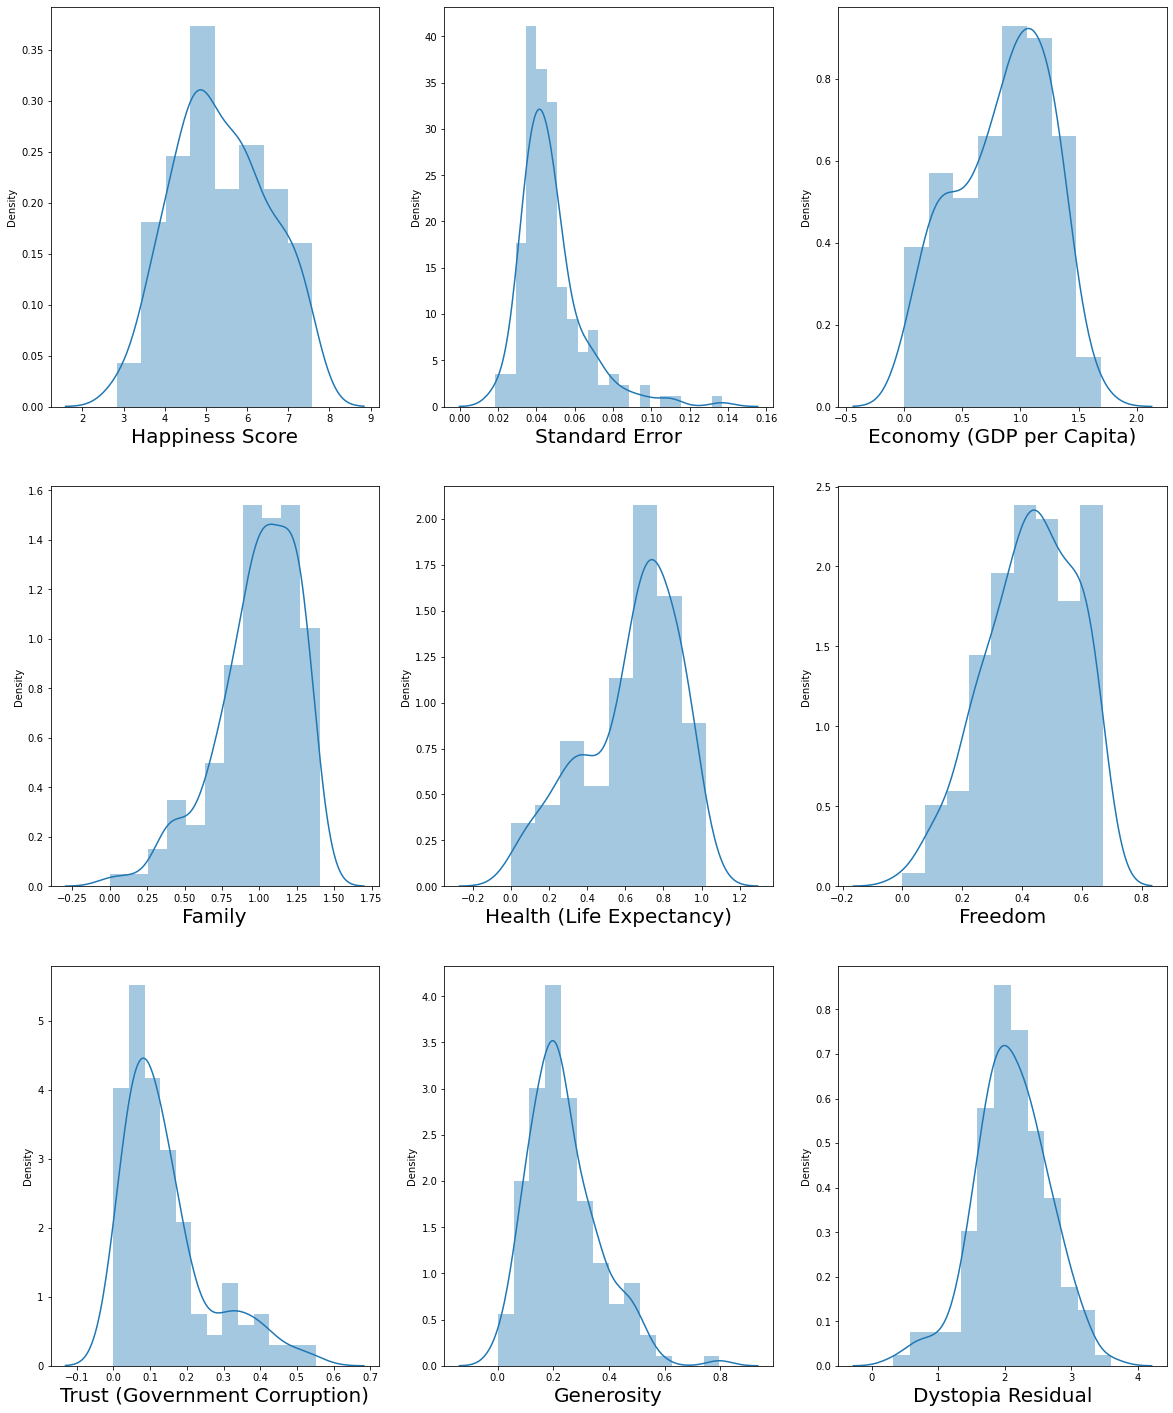

In [105]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

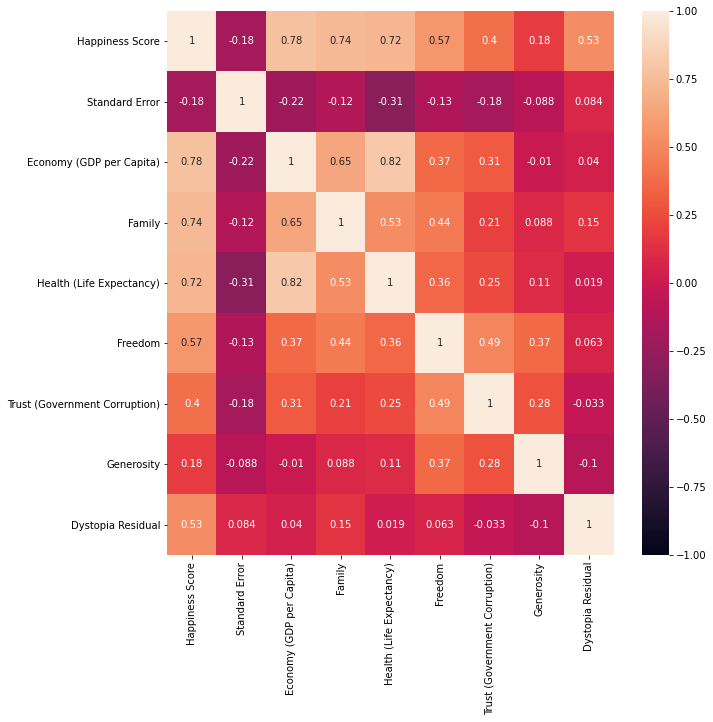

In [106]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [107]:
df.dtypes

Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [108]:
y=df['Happiness Score']
x=df.drop('Happiness Score', axis=1)

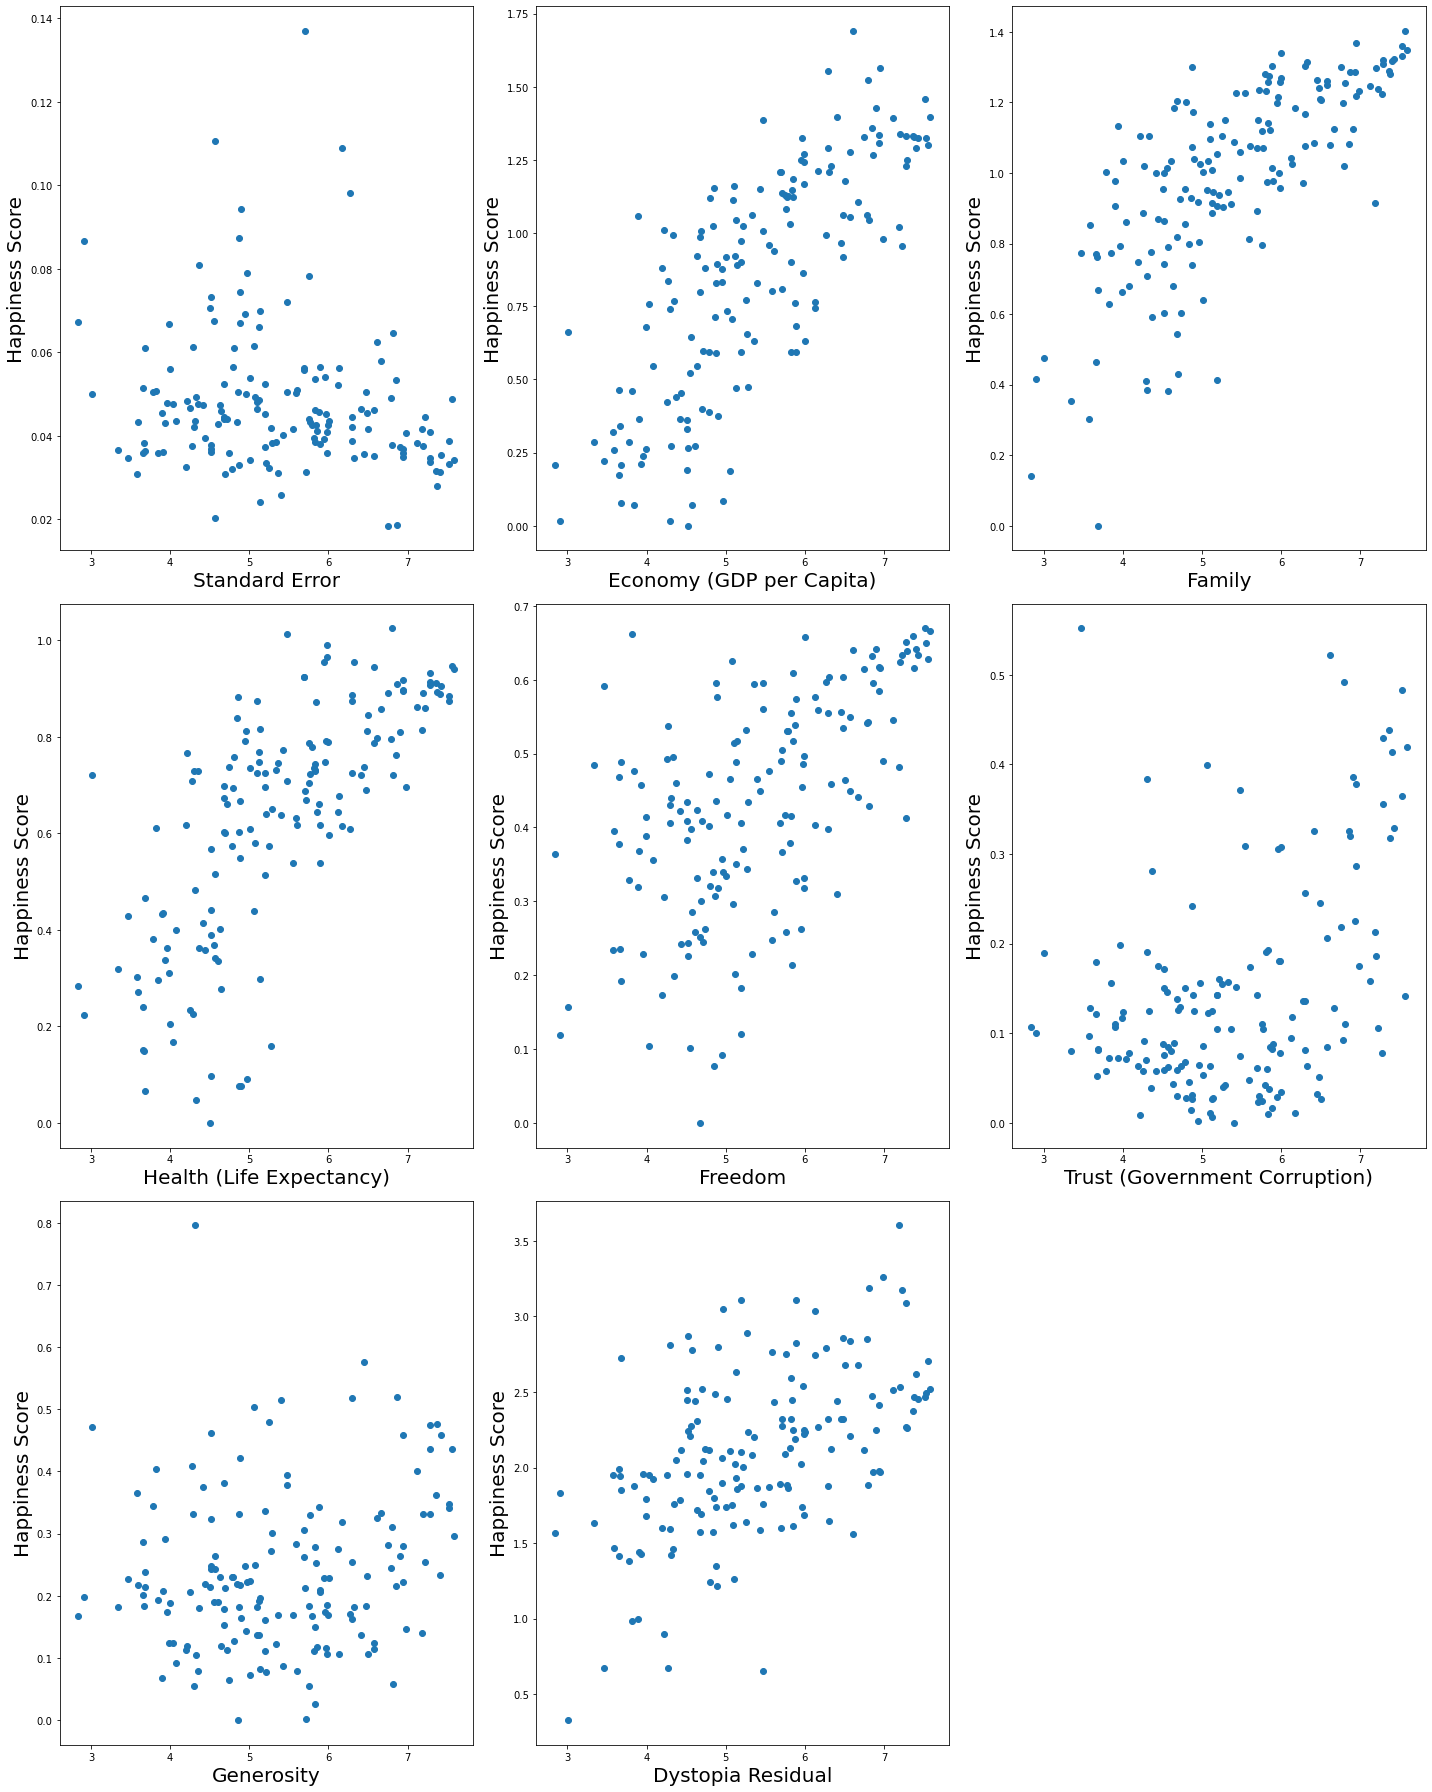

In [109]:
# Visualizing Relationship
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(y,x[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score', fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Standard error is having distorted value

In [110]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [111]:
# split data into train and test. Model will be build on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=30)

In [112]:
y_train.head()

115    4.571
81     5.192
108    4.694
132    4.252
66     5.689
Name: Happiness Score, dtype: float64

## Model instantiating and training

In [113]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [114]:
df.head(2)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [115]:
print('Happines Score is :',regression.predict(scalar.transform([[0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738]])))

Happines Score is : [7.5868437]


In [116]:
# Adjusted R2 score
regression.score(x_train,y_train)

0.9999999368463107

## Lets check how well model fits the test data.

In [117]:
regression.score(x_test,y_test)

0.9999999486597793

## Lets plot and visualize

In [ ]:
y_pred = regression.predict(x_test)

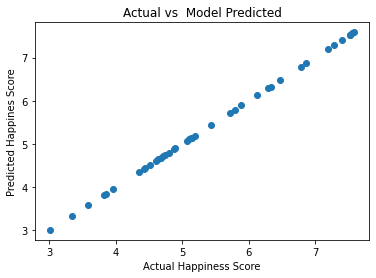

In [118]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happines Score')
plt.title('Actual vs  Model Predicted')
plt.show()

In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [120]:
y_pred = regression.predict(x_test)

In [121]:
mean_absolute_error(y_test,y_pred)

0.000255004385221691

In [122]:
mean_squared_error(y_test,y_pred)

8.368387168846914e-08

In [123]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.00028928164768693697